In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch

from pathlib import Path
HOME = Path.home()
MNIST_PATH = HOME / 'data' / 'mnist'

### Read this First

#### Remember that `tab` is is useful for autocompletion.

#### Remember that `shift + tab` is useful for rapidly obtaining usage + documentation.

### Basic Shapes and Types in NumPy

**Create a 1-D array of 5 zeros named `array_of_zeros`. Print it, verify that its shape is `[5]`, and print its `dtype`.**

In [56]:
array_of_zeros = np.zeros(5)
print(array_of_zeros.shape)
print(array_of_zeros.dtype)

(5,)
float64


**Print the transpose of `array_of_zeros`.**

In [57]:
print(array_of_zeros)
transposed_array_of_zeros = np.transpose(array_of_zeros)
print(transposed_array_of_zeros)

[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]


**In the following Markdown Cell, answer:**

**Is its transpose what you expected? Why or why not?**

No, this is not the transpose I expected. Because, I thought a row matrix would transpose to a column matrix, but then realized that, in numpy, a row matrix should have a shape [1,5] and not [5,]. Basically, 2-D Matrices can only be transposed to see the result visually and not 1D matrices.

**Create a 2-D array of 5 zeros, named `array_of_zeros`, with shape `[1, 5]`. Print it, and print its shape.**

In [58]:
array_of_zeros = np.zeros((1,5))
print(array_of_zeros)
print(array_of_zeros.shape)

[[0. 0. 0. 0. 0.]]
(1, 5)


**Print the transpose of `array_of_zeros`.**

In [59]:
transposed_array_of_zeros = np.transpose(array_of_zeros)
print(transposed_array_of_zeros)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


**In the following Markdown Cell, answer:**

**Is its transpose what you expected? Why or why not?**

Yes, this is what I expected, because a 2D matrix of shape [1,5] transposes to a 2D matrix of shape [5,1].

**Create a 1-D array of 5 zeros, named `array_of_zeros`, with a `dtype` of `np.float`. Print it, and its `dtype`.**

In [60]:
array_of_zeros = np.zeros(5, dtype=np.float)
print(array_of_zeros)
print(array_of_zeros.dtype)

[0. 0. 0. 0. 0.]
float64


**In the following Markdown Cell, answer:**

**Does this array contain floats with 32 bit precision or 64 bit precision?**

It contains floats with 64 bit precision.

**Create a 1-D array of 5 zeros, named `array_of_zeros`, with a `dtype` of `np.int`. Print it, and its `dtype`.**

In [61]:
array_of_zeros = np.zeros(5, dtype=np.int)
print(array_of_zeros)
print(array_of_zeros.dtype)

[0 0 0 0 0]
int64


**In the following Markdown Cell, answer:**

**Does this array contain 32-bit integers or 64-bit integers?**

It contains 64-bit integers.

When dealing with GPUs, we will often want to use 32 bit precision.

**Create a 1-D array of 5 zeros, named `array_of_zeros`, with a `dtype` of `np.float32`. Print it, and its `dtype`.**

In [62]:
array_of_zeros = np.zeros(5, dtype=np.float32)
print(array_of_zeros)
print(array_of_zeros.dtype)

[0. 0. 0. 0. 0.]
float32


**Create a 1-D array of 5 zeros, named `array_of_zeros`, with a `dtype` of `np.float`, and then create `array_of_zeros_32` by casting `array_of_zeros`. Print it, and its `dtype`.**

In [63]:
array_of_zeros = np.zeros(5, dtype=np.float)
array_of_zeros_32 = array_of_zeros.astype(np.float32)
print(array_of_zeros_32)
print(array_of_zeros_32.dtype)

[0. 0. 0. 0. 0.]
float32


### `np.arange`, Element-Wise Operations, and Reshaping

**Create `x1` to be a 1-D array of floats containing `[0, 1, 2, 3, 4]`, but do not type these values explicitly; instead, use `np.arange`. Also create `x2` in the exact same way. Print `x1`, `x2`, and `x1`'s `dtype`. Be sure `x1` and `x2` store floats, not ints.**

In [64]:
x1 = np.arange(5.0)
x2 = np.arange(5.0)
print(x1)
print(x2)
print(x1.dtype)

[0. 1. 2. 3. 4.]
[0. 1. 2. 3. 4.]
float64


**Create `y` via `y = x1 + x2`. Print `y` and its `dtype`.**

In [65]:
y = x1 + x2
print(y)
print(y.dtype)

[0. 2. 4. 6. 8.]
float64


**Reshape `x1` to have shape `[1, 5]` and `x2` to have shape `[5, 1]`. Print their shapes.**

In [66]:
x1 = x1.reshape(1,5)
x2 = x2.reshape(5,1)
print(x1.shape)
print(x2.shape)

(1, 5)
(5, 1)


**Form `y` via `y = x1 + x2`. Print `y`.**

In [67]:
y = x1 + x2
print(y)

[[0. 1. 2. 3. 4.]
 [1. 2. 3. 4. 5.]
 [2. 3. 4. 5. 6.]
 [3. 4. 5. 6. 7.]
 [4. 5. 6. 7. 8.]]


**In the following Markdown Cell, answer:**

**Is this what you expected? (For now, just a 'Yes' or 'No' is fine; we will revisit this result later.)**

No. Now understood that it was due to broadcasting!

**Create a 1-D array x containing integers 0, 1, ..., 8 using `np.arange`. Print it, and its `dtype`.**

In [68]:
x = np.arange(9)
print(x)
print(x.dtype)

[0 1 2 3 4 5 6 7 8]
int64


**Create `X` by reshaping `x` to have shape `[3, 3]`. Print `X`.**

In [69]:
x = x.reshape(3,3)
print(x)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


NumPy arrays are typically contiguous strips of memory, with the shape specifying how we view that memory. For example, if the shape of the strip of memory `[0, 1, 2, 3]` is `[2, 2]`, then we view it as a 2 x 2 matrix.


**In the following Markdown Cell, answer:**


**Given your previous `reshape` result, and the fact that `reshape` only changes our view of a contiguous strip of memory, do *rows* have elements that are mutually closer in memory, or do *columns* have elements that are mutually closer in memory?**

The rows have elements that are mutually closer in memory. And, the last element of each row is mutually closer in memory to the first element of the corresponding next row.

### Indexing, Masks, and Concatenation Using MNIST

**Run the following code to download and load the MNIST training set.** (The data will be downloaded if it is not already present.)

In [0]:
import torchvision
official_mnist_train = torchvision.datasets.MNIST(str(MNIST_PATH), train=True, download=True)
train_images = official_mnist_train.train_data.numpy().astype(np.float)
train_labels = official_mnist_train.train_labels.numpy().astype(np.int)

**Print the shape of `train_images` and `train_labels`.**

In [71]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


**In the following Markdown Cell, answer:**

**Based on these shapes, how many training images are there? And what is the height and width of each image?**

There are 60,000 training images and each image is of height = 28 px and width = 28 px

**Form `first_image` as a 2-D array with shape `[28, 28]`, containing the 0-th image of `train_images`, and visualize `first_image` using `plt.imshow`.** Also feel free to run `plt.set_cmap('gray')` after plotting the image if you'd like to see it using a grayscale colormap.

(28, 28)


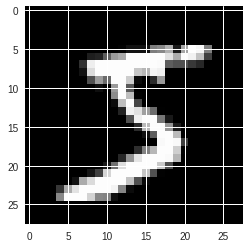

In [72]:
first_image = train_images[0]
print(first_image.shape)
plt.imshow(first_image)
plt.set_cmap('gray')

**Print the label of the 0-th image.**

In [73]:
print(train_labels[0])

5


**Create a 2-D array `first_image_flipped` that consists of the first training image *but flipped horizontally*, and visualize the result using `plt.imshow`.** Note that `first_image` has a shape of `[H, W]`, where `H` is the height of the image and `W` is the width of the image.

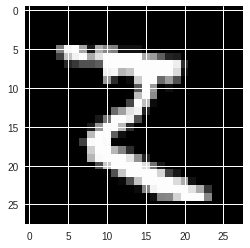

In [74]:
first_image_flipped = np.flip(first_image, 1)
plt.imshow(first_image_flipped)

**Create a 2-D array `first_image_down_2` that consists of the first training image but downsampled by a factor of 2, and plot the result using `plt.imshow`.** (The resulting image should have shape `[14, 14]`.)

(14, 14)


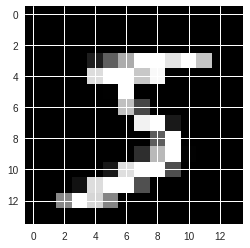

In [75]:
first_image_down_2 = first_image[::2, ::2]
plt.imshow(first_image_down_2)
print(first_image_down_2.shape)

**Create a 2-D array `first_image_down_4` that consists of the first training image but downsampled by a factor of 4, and plot the result using `plt.imshow`.** (The resulting image should have shape `[7, 7]`.)

(7, 7)


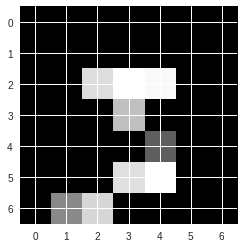

In [76]:
first_image_down_2 = first_image[::4, ::4]
plt.imshow(first_image_down_2)
print(first_image_down_2.shape)

**Print the minimum and maximum values of `first_image`.**

In [77]:
print("min: ", np.min(first_image))
print("max: ", np.max(first_image))

min:  0.0
max:  255.0


**Create a copy of `first_image`, `first_image_copy`, using `first_image_copy = first_image.copy()`.**

In [0]:
first_image_copy = first_image.copy()

**Create a 2-D boolean mask named `mask` with the same shape as `first_image_copy`, with elements that are `True` whenever a pixel's value exceeds 50 and which is `False` otherwise. Print `mask`'s `dtype` and also print how many values are `True`.**

In [79]:
mask = np.full(first_image_copy.shape, False)
true_indices = first_image_copy > 50
mask[true_indices] = True
print(mask.dtype)
print(np.count_nonzero(mask))

bool
134


**Visualize `mask` using `plt.imshow`.**

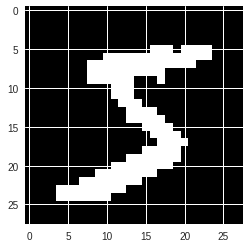

In [80]:
plt.imshow(mask)

**Create `mask_upper_half` by keeping only the upper half of `mask`, and visualize `mask_upper_half` using `plt.imshow`.** (`mask_upper_half` should have shape `[14, 28]`.)

(14, 28)


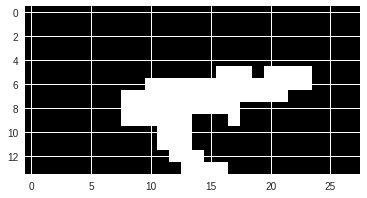

In [81]:
mask_upper_half = mask[:14,:]
print(mask_upper_half.shape)
plt.imshow(mask_upper_half)

**Halve all pixels that exceed 50 in `first_image_copy` that exceed a value of 50, in place, using `mask`, and then print the minimum and maximum values of `first_image_copy`.**

In [82]:
first_image_copy[mask]/=2
print(np.min(first_image_copy))
print(np.max(first_image_copy))

0.0
127.5


**Form `first_ten_images_as_one` by concatenating the first 10 training MNIST images horizontally, and visualize the result using `plt.imshow`.**

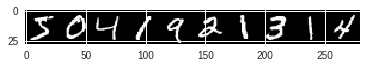

In [83]:
first_ten_images_as_one = np.concatenate([train_images[i] for i in range(10)], axis=1)
plt.imshow(first_ten_images_as_one)

### Element-Wise Multiplication vs. Matrix Multiplication

**Create `A` and `B`, each 2-D matrices of ones with shape `[3, 3]`.**

In [0]:
A = np.ones((3,3))
B = np.ones((3,3))

**Form `C_star` via `C_star = A * B`, and print `C_star`.**

In [85]:
C_star = A * B
print(C_star)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


**Form `C_at` via `C_at = A @ B`, and print `C_at`.**

In [86]:
C_at = A @ B
print(C_at)

[[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]]


**In the following Markdown Cell, answer:**

**What operation does `*` perform? What operation does `@` perform?**

The * multiplies the arrays A and B, element by element. Whereas the @ performs the standard matrix multiplication (dot product) of A and B.

### Broadcasting

Suppose you have some data collected in a 1-D array, which is not 'normalized' in the sense that it has a mean that's far from 0 and a standard deviation that's far from 1:

In [87]:
x = np.array([3.2, 1.1, 1.2, 5.3, 3.9, 1.9, 2.0, 6.2, 1.0, 2.2])
print(x.mean())
print(x.std())

2.8
1.7227884373886422


**Form `z` by normalizing `x`. That is, each entry in `z` should be the *standardized score* of the corresponding entry in `x`: $z_i = (x_i - \mu) / \sigma$. Print `z` and verify that its mean is close to 0.0 and that its standard deviation is close to 1.0.**

In [88]:
z = (x - x.mean())/x.std()
print(z)
print(z.mean())
print(z.std())

[ 0.23218173 -0.98677235 -0.92872692  1.45113581  0.63849976 -0.52240889
 -0.46436346  1.97354471 -1.04481779 -0.3482726 ]
9.992007221626409e-17
1.0000000000000002


Now suppose that you have 5 3-dimensional feature vectors collected in an array, and that none of the features are normalized, in that each feature has a mean that's far from 0 and a standard deviation that's far from 1:

In [89]:
data = np.array([[7.5, -1.1,  1.6],
                 [0.1,  0.9, -0.7],
                 [6.3, -0.9,  3.1],
                 [2.5, -0.6,  0.4],
                 [2.4, -0.1,  1.0]])
print(data.mean(axis=0))
print(data.std(axis=0))

[ 3.76 -0.36  1.08]
[2.73027471 0.71442284 1.26396202]


**Write code to normalize this data on a feature-wise basis, so that each feature has mean 0 and standard deviation 1, and store the result in `normalized_data`. Print `normalized_data` along with its per-feature mean and its per-feature standard deviation.**

In [90]:
normalized_data = (data - data.mean(axis=0)) / data.std(axis=0)
print(normalized_data)
print(normalized_data.mean(axis=0))
print(normalized_data.std(axis=0))

[[ 1.36982553 -1.03580115  0.41140477]
 [-1.34052445  1.76366141 -1.40827016]
 [ 0.93030932 -0.75585489  1.59814928]
 [-0.46149202 -0.33593551 -0.53799085]
 [-0.49811837  0.36393013 -0.06329304]]
[ 1.88737914e-16  1.11022302e-17 -5.55111512e-18]
[1. 1. 1.]


Now suppose that you have 3 3-D vectors that each represent *unnormalized class scores*. That is, each 3-D vector represents the scores for three different classes in a classification problem. (For example, these could be the outputs of an image-classification model, with each row corresponding to a particular image and each column corresponding to a particular class, such as 'dog', 'cat', or 'other'.)

If each row represented a valid probability distribution, then their elements would sum do 1, but they currently do not:

In [91]:
scores = np.array([[8.2, 6.7, 6.3],
                   [9.5, 0.2, 9.3],
                   [3.6, 2.7, 9.0]])
print(scores)
print(scores.sum(axis=1))

[[8.2 6.7 6.3]
 [9.5 0.2 9.3]
 [3.6 2.7 9. ]]
[21.2 19.  15.3]


**Write code to compute and print the array `probabilities` by dividing each row of `scores` by its sum. Print `probabilities` and the sum of each of its rows, to verify that each row sums to 1.** Hint: If the rows do not sum to 1, then think about broadcasting and take a look at the `keepdims` keyword argument of NumPy's `sum` function.

In [92]:
probabilities = scores / scores.sum(axis=1, keepdims=True)
print(probabilities)
print(probabilities.sum(axis=1))

[[0.38679245 0.31603774 0.29716981]
 [0.5        0.01052632 0.48947368]
 [0.23529412 0.17647059 0.58823529]]
[1. 1. 1.]


**Complete the `tril_` function below by inserting only 2 lines of code at the bottom of the function.** Hint: Form a mask using broadcasting, and use the mask to modify `X` in place.

In [0]:
def tril_(X):
    """Modify X in place to become lower triangular.

    Args:
        X: A 2-D NumPy array with shape [M, N].
    """
    if X.ndim != 2:
        raise ValueError('X must be a 2-D array.')
    M, N = X.shape
    i = np.arange(M).reshape(1, M)
    j = np.arange(N).reshape(N, 1)
    
    upper_triangle_mask = i>j
    X[upper_triangle_mask] = 0

**Create a random matrix `X` with shape `[3, 3]` using `np.random.rand`, run `tril_(X)`, and verify that `X` is now lower triangular.**

In [94]:
X = np.random.rand(3,3)
tril_(X)
print(X)

[[0.35671095 0.         0.        ]
 [0.21110452 0.09896978 0.        ]
 [0.28200488 0.45133154 0.12825627]]


**Create a random matrix `X` with shape `[5, 5]` using `np.random.rand`, run `tril_(X)`, and verify that `X` is now lower triangular.**

In [95]:
X = np.random.rand(5,5)
tril_(X)
print(X)

[[0.16862897 0.         0.         0.         0.        ]
 [0.50765816 0.47207842 0.         0.         0.        ]
 [0.65521634 0.77118226 0.23227529 0.         0.        ]
 [0.3159844  0.19857903 0.67645456 0.79154413 0.        ]
 [0.08013568 0.78302037 0.82239975 0.48541881 0.05734495]]


### Booleans vs. Masks

**Create `x` using `x = np.array([1, 2, 3])`, and create `y` using `y = x`.**

In [0]:
x = np.array([1, 2, 3])
y = x

**Print the expression `x == y`.**

In [97]:
print(x == y)

[ True  True  True]


**Use `np.all` to test whether *all* elements of `x` are equal to their corresponding elements in `y`. You should print the result, which should be a single boolean, `True` or `False`.**

In [98]:
print(np.all(x == y))

True


**Modify the 0-th element of `y` via `y[0] = 5`, and again use `np.all` to test whether all elements of `x` are equal to their corresponding elements in `y`, and again print the result.**

In [99]:
y[0] = 5
print(np.all(x == y))

True


**In the Markdown Cell below, answer:**

**Is the last result what you expected? Explain what is happening here.**

I expected that any change in y will reflect in x.
Because, in python, if we use the normal assignment (=) operator to copy data, both x and y are effectively the same objects internally. (see below)

In [100]:
print(x)
print(y)
print(id(x) == id(y)) # x and y are the same objects

[5 2 3]
[5 2 3]
True


**Create `x = np.array([1, 2, 3])` and `y = np.array([2, 2, 2])`. Again use `np.all` to test whether all elements of `x` are equal to their corresponding elements in `y`, and again print the result.**

In [101]:
x = np.array([1, 2, 3])
y = np.array([2, 2, 2])
print(np.all(x == y))

False


**Use `np.any` to test whether *any* elements of `x` are equal to their corresponding elements in `y`, and again print the result.**

In [102]:
print(np.any(x == y))

True
